In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
import re
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.svm import SVC
import os

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\91878\OneDrive\Desktop'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\91878\OneDrive\Desktop\2. Purchase logistic_regression.html
C:\Users\91878\OneDrive\Desktop\Adobe Premiere Pro 2022.lnk
C:\Users\91878\OneDrive\Desktop\Anaconda3-2022.05-Windows-x86_64.exe
C:\Users\91878\OneDrive\Desktop\Automobile_data.csv
C:\Users\91878\OneDrive\Desktop\CodeBlocks.lnk
C:\Users\91878\OneDrive\Desktop\Day 2 (Module 4 - Clustering).ipynb
C:\Users\91878\OneDrive\Desktop\desktop.ini
C:\Users\91878\OneDrive\Desktop\drive-download-20220817T125705Z-001.zip
C:\Users\91878\OneDrive\Desktop\Eclipse IDE for Enterprise Java and Web Developers - 2021-12.lnk
C:\Users\91878\OneDrive\Desktop\Eclipse IDE for Java Developers - 2021-12.lnk
C:\Users\91878\OneDrive\Desktop\Exam_mark_prediction_using_Linear_Regression-Copy1.html
C:\Users\91878\OneDrive\Desktop\future-sales-prediction.html
C:\Users\91878\OneDrive\Desktop\Google Chrome.lnk
C:\Users\91878\OneDrive\Desktop\IBALauncher.exe
C:\Users\91878\OneDrive\Desktop\IBAWindowsLauncher.zip
C:\Users\91878\OneDrive\Desktop\kNN classi

In [3]:
df = pd.read_csv(r'C:\Users\91878\OneDrive\Desktop\spam.csv',encoding='Windows-1252')

In [4]:
import chardet
with open(r'C:\Users\91878\OneDrive\Desktop\spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [5]:
df.shape

(5572, 5)

In [6]:
# df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
import nltk
nltk.download('punkt')
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91878\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

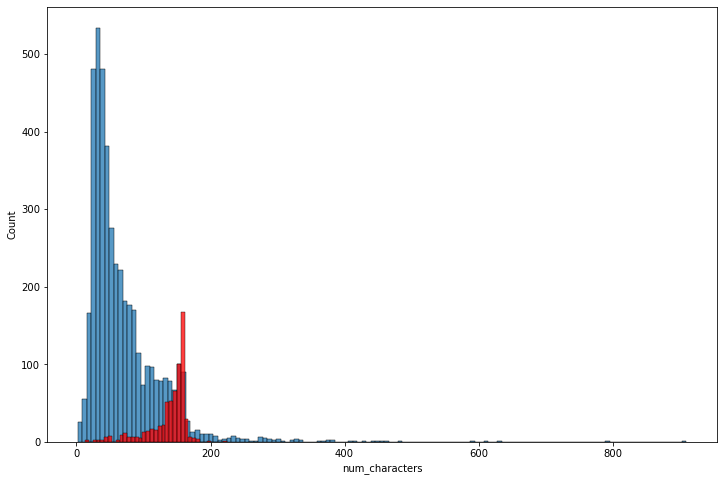

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

In [31]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


In [32]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["text"]).toarray()
np.shape(X)

(5169, 8405)

In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['target'], test_size=0.70, random_state=42)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
gnb = GaussianNB()

In [36]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8864327162199502
[[2797  356]
 [  55  411]]


In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
ac

0.8798010500138159

In [40]:
cm

array([[3153,    0],
       [ 435,   31]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3153
           1       1.00      0.07      0.12       466

    accuracy                           0.88      3619
   macro avg       0.94      0.53      0.53      3619
weighted avg       0.89      0.88      0.83      3619



In [53]:
    svc = svm.SVC()
    svc.fit(X_train, y_train)
    score_train = svc.score(X_train, y_train)
    score_test= svc.score(X_test, y_test)
    recall_test = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test = metrics.precision_score(y_test, svc.predict(X_test))

In [56]:
matrix = np.matrix(np.c_[score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             [ 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.994839,0.953302,0.639485,0.996656
